In [1]:
%matplotlib inline
import numpy as np # import numpy library as np
import matplotlib.pyplot as plt # import pyplot library as plt
from mpl_toolkits.mplot3d import Axes3D # import Axes3D from `mpl_toolkits.mplot3d`
import matplotlib.animation as animation
plt.style.use('ggplot') # use "ggplot" style for graphs

In [2]:
dim = 3 # system dimension (x,y,z)
nump = 1000 # number of independent Brownian particles to simulate
nums = 3000 # number of simulation steps
dt = 0.05 # set time increment, \Delta t
zeta = 1.0 # set friction constant, \zeta
m = 1.0 # set particle mass, m
kBT = 1.0 # set temperatute, k_B T
std = np.sqrt(2*kBT*zeta*dt) # calculate std for \Delta W via Eq.(F11)

np.random.seed(0) # initialize random number generator with a seed=0
R = np.zeros([nump,dim]) # array to store current positions and set initial condition 
V = np.zeros([nump,dim]) # array to store current velocities and set initial condition 
W = np.zeros([nump,dim]) # array to store current random forcces
Rs = np.zeros([nums,nump,dim]) # array to store positions at all steps
Vs = np.zeros([nums,nump,dim]) # array to store velocities at all steps
Ws = np.zeros([nums,nump,dim]) # array to store random forces at all steps
time = np.zeros([nums]) # an array to store time at all steps

In [3]:
for i in range(nums): # repeat the following operations from i=0 to nums-1
    W = std*np.random.randn(nump,dim) # generate an array of random forces accordingly 
    R, V = R + V*dt, V*(1-zeta/m*dt)+W/m # update R & V via Eqs.(F5)&(F9)
    Rs[i,:,:]=R # accumulate particle positions at each step in an array Rs
    Vs[i,:,:]=V # accumulate particle velocitys at each step in an array Vs
    Ws[i,:,:]=W # accumulate random forces at each step in an array Ws
    time[i]=i*dt # store time in each step in an array time

Fitted D = 1.0189646495827576 in cm^2 min^-1
D = 1.0 (Theoretical)
D = 0.9820970095442588 (Simulation via MSD)


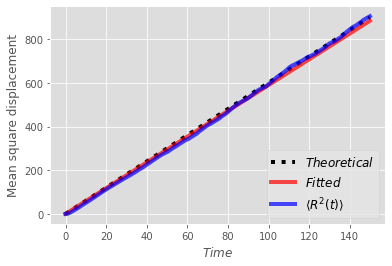

In [4]:
# mean square displacement vs time
msd = np.zeros([nums])

for i in range(nums): # loop over time steps
    linalg =  np.linalg.norm(Rs[i,:,:], axis=1)**2
    algsum = np.sum(linalg)
    msd[i] = msd[i] + algsum # (R(t) - R(0))^2 = R(t)^2, since R(0)
    msd[i] = msd[i]/nump # average over particles

dmsd = np.trapz(msd, dx=dt)/ (3*(nums*dt)**2) # integrate using trapezoidal rule

fit = np.polyfit(time, msd, 1)
print('Fitted D =',fit[0]/6,'in cm^2 min^-1')
d1 = fit[0]/6

predict = np.poly1d(fit)
theory = predict(time)

dmsdfit = 6*dmsd*time

print('D =',kBT/zeta,'(Theoretical)')
print('D =',dmsd,'(Simulation via MSD)')

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.set_xlabel(r"$Time$",fontsize=12)
ax.set_ylabel(r"Mean square displacement",fontsize=12)
#ax.plot(time,6*kBT/zeta*time,'k',lw=4, ls='dotted', label=r'$6D\,t={6k_BT \,t}/{\zeta}$')
ax.plot(time,6*kBT/zeta*time,'k',lw=4, ls='dotted', label=r'$Theoretical$')
ax.plot(time,dmsdfit,'r',lw=4, alpha=0.7, label=r'$Fitted$')
ax.plot(time, msd,'b',lw=4, alpha=0.7, label=r'$\langle R^2(t)\rangle$')
ax.legend(fontsize=12,loc=4)
plt.savefig('Figures/einstein ind msd.pdf', bbox_inches='tight')
plt.show()

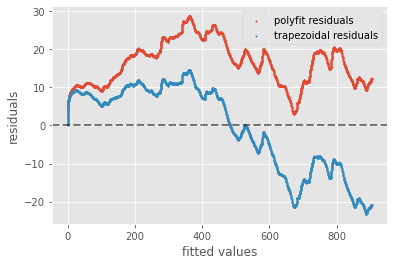

In [5]:
ratio1 = (theory-fit[1]) - msd

ratio2 = dmsdfit - msd

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(msd, ratio1, s=2, label='polyfit residuals') # plot y/ya vs. t
ax.scatter(msd, ratio2, s=2, label='trapezoidal residuals') # plot y/ya vs. t
ax.axhline(y=0, color='k', alpha=0.5, lw=2 ,linestyle='--')
ax.set_xlabel(r"fitted values", fontsize=12)
ax.set_ylabel(r"residuals", fontsize=12)
#ax.set_ylim(ymin=0.8, ymax= 1.1)
ax.legend() #display legends
plt.savefig('Figures/einstein ind residuals.pdf', bbox_inches='tight')
plt.show() #display plots

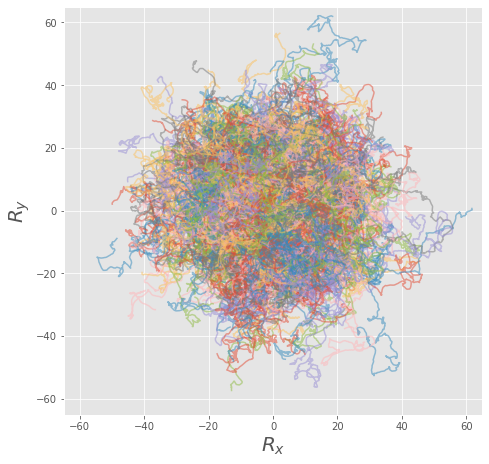

In [6]:
box=130. # set draw area as box^2
fig, ax = plt.subplots(figsize=(7.5,7.5)) # set fig with its size 7.5 x 7.5 inch
ax.set_xlabel(r"$R_x$", fontsize=20) # set x-label
ax.set_ylabel(r"$R_y$", fontsize=20) # set y-label
plt.xlim(-box/2,box/2) # set x-range
plt.ylim(-box/2,box/2) # set y-range
ax.plot(Rs[:,:,0],Rs[:,:,1],alpha=0.5) # plot trajectiries of all particles
plt.savefig('Figures/einstein ind 2D paths.pdf', bbox_inches='tight')
plt.show() # draw plots

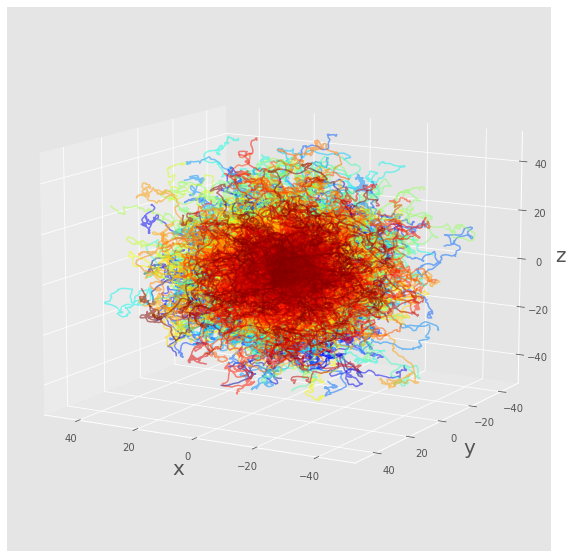

In [7]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,nump)))

box=100. # set draw area as box^3
fig = plt.figure(figsize=(10,10)) # set fig with its size 10 x 10 inch
ax = fig.add_subplot(111,projection='3d') # creates an additional axis to the standard 
ax.set_xlim(-box/2,box/2) # set x-range
ax.set_ylim(-box/2,box/2) # set y-range
ax.set_zlim(-box/2,box/2) # set z-range
ax.set_xlabel(r"x",fontsize=20) # set x-label
ax.set_ylabel(r"y",fontsize=20) # set y-label
ax.set_zlabel(r"z",fontsize=20) # set z-label
ax.view_init(elev=12,azim=120) # set view point
for n in range(nump): # repeat from n=0 to nump-1
    ax.plot(Rs[:,n,0],Rs[:,n,1],Rs[:,n,2],alpha=0.5, color=next(colors)) # plot trajectiries of all particle
plt.savefig('Figures/einstein ind 3D paths jet.pdf', bbox_inches='tight')
plt.show() # draw plots

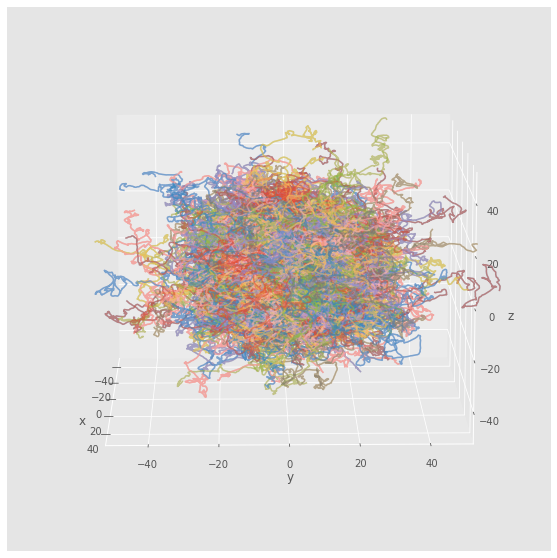

In [10]:
#jet= plt.get_cmap('jet')
#colors = iter(jet(np.linspace(0,1,num)))

# Create a figure and a 3D Axes
fig = plt.figure(figsize=(10,10)) # set fig with its size 10 x 10 inch
ax = fig.add_subplot(111,projection='3d') # creates an additional axis to the standard 
ax.set_xlim(-box/2,box/2) # set x-range
ax.set_ylim(-box/2,box/2) # set y-range
ax.set_zlim(-box/2,box/2) # set z-range
ax.set_xlabel(r"x",fontsize=12) # set x-label
ax.set_ylabel(r"y",fontsize=12) # set y-label
ax.set_zlabel(r"z",fontsize=12) # set z-label

# Create an init function and the animate functions.
# Both are explained in the tutorial. Since we are changing
# the the elevation and azimuth and no objects are really
# changed on the plot we don't have to return anything from
# the init and animate function. (return value is explained
# in the tutorial.
def init():
    for n in range(nump): # repeat from n=0 to nump-1
        ax.plot(Rs[:,n,0],Rs[:,n,1],Rs[:,n,2],alpha=0.5) # plot trajectiries of all particle
    return fig,

def animate(i):
    ax.view_init(elev=12., azim=i)
    return fig,

# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)
# Save
anim.save(r'Figures/einstein ind 3D rotation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

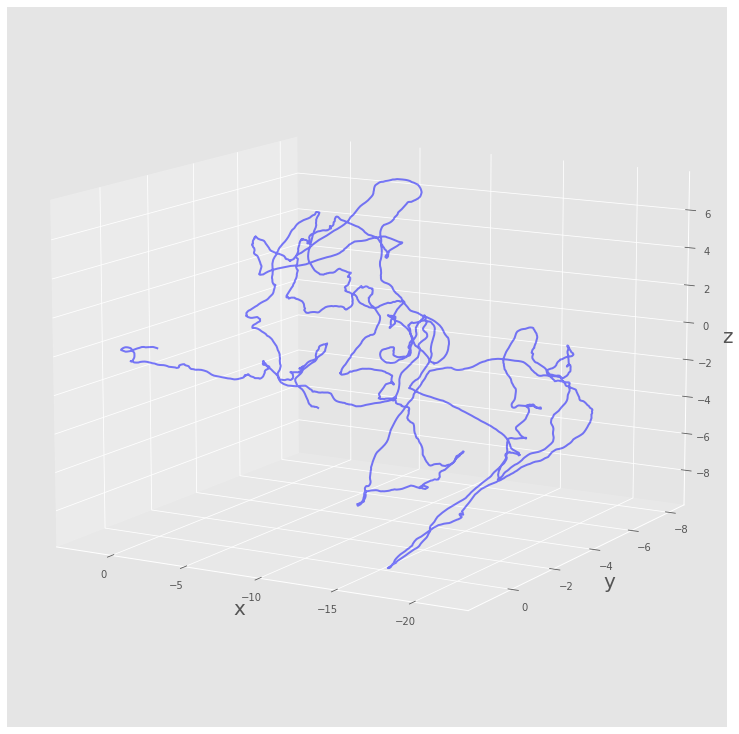

In [7]:
# ANIMATION FUNCTION
def func(num, dataSet, line):
    # NOTE: there is no .set_data() for 3 dim data...
    line.set_data(dataSet[0:2, :num])    
    line.set_3d_properties(dataSet[2, :num])    
    return line

# THE DATA POINTS
dataSet = np.array([Rs[:,0,0], Rs[:,0,1], Rs[:,0,2]])
numDataPoints = len(Rs[:,0,0])
 
# GET SOME MATPLOTLIB OBJECTS
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
 
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, alpha=0.5, c='b')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
#ax.set_xlim3d(0,nx) # set x-range
#ax.set_ylim3d(0,ny) # set y-range
#ax.set_zlim3d(0,nz) # set z-range
ax.set_xlabel(r"x",fontsize=20) # set x-label
ax.set_ylabel(r"y",fontsize=20) # set y-label
ax.set_zlabel(r"z",fontsize=20) # set z-label
ax.view_init(elev=12,azim=120) # set view point
 
# Creating the Animation object
line_ani = animation.FuncAnimation(fig, func, frames=numDataPoints, fargs=(dataSet,line), interval=5, blit=False)
line_ani.save(r'Figures/einstein ind 3D single.mp4')
 
 
plt.show() # draw plots

0
17.31762108374011


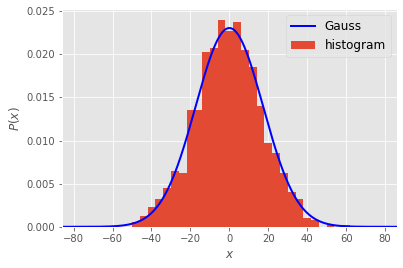

In [8]:
ave = 0 # Average position i.e. starting position
std = np.sqrt(2*kBT/zeta*time[nums-1]) # Standard deviation i.e. sqrt(2Dt)

nmin=int(ave-std*5)
nmax=int(ave+std*5)
nbin=int((nmax-nmin)/4)

fig = plt.figure()
ax = fig.add_subplot(111)

print(ave)
print(std)

ax.hist(Rs[nums-1,:,0],range=[nmin,nmax],bins=nbin,density=True, stacked=True) # plot normalized histogram of L

x1 = np.arange(nmin,nmax,0.01/std) # create array of x from nmin to nmax with increment
y = np.exp(-(x1-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical

ax.plot(x1,y,lw=2,color='b') # plot y vs. x with blue line
#ax.set_title(r'x-axis particle distribution')
ax.set_xlabel(r'$x$',fontsize=12) # set x-label
ax.set_ylabel(r'$P(x)$',fontsize=12) # set y-label
ax.legend([r'Gauss',r'histogram'], fontsize=12, loc='upper right') # set legends
ax.set_xlim(nmin,nmax) # set x-range
plt.savefig('Figures/einstein ind x distr.pdf', bbox_inches='tight')
plt.show() # display plots

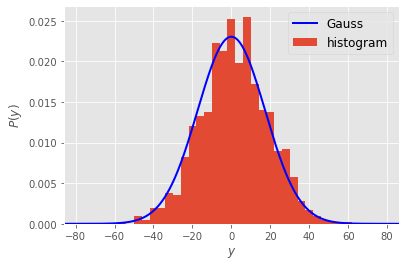

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(Rs[nums-1,:,1],range=[nmin,nmax],bins=nbin,density=True, stacked=True) # plot normalized histogram of L

x1 = np.arange(nmin,nmax,0.01/std) # create array of x from nmin to nmax with increment 
y = np.exp(-(x1-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical

ax.plot(x1,y,lw=2,color='b') # plot y vs. x with blue line
#ax.set_title(r'y-axis particle distribution')
ax.set_xlabel(r'$y$',fontsize=12) # set x-label
ax.set_ylabel(r'$P(y)$',fontsize=12) # set y-label
ax.legend([r'Gauss',r'histogram'], fontsize=12, loc='upper right') # set legends
ax.set_xlim(nmin,nmax) # set x-range
plt.savefig('Figures/einstein ind y distr.pdf', bbox_inches='tight')
plt.show() # display plots

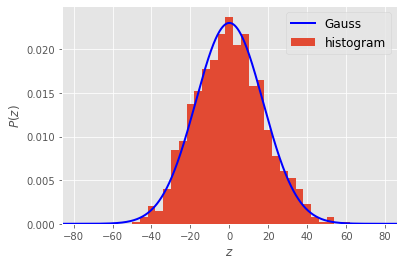

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(Rs[nums-1,:,2],range=[nmin,nmax],bins=nbin,density=True, stacked=True) # plot normalized histogram of L

x1 = np.arange(nmin,nmax,0.01/std) # create array of x from nmin to nmax with increment 
y = np.exp(-(x1-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical

ax.plot(x1,y,lw=2,color='b') # plot y vs. x with blue line
#ax.set_title(r'z-axis particle distribution')
ax.set_xlabel(r'$z$',fontsize=12) # set x-label
ax.set_ylabel(r'$P(z)$',fontsize=12) # set y-label
ax.legend([r'Gauss',r'histogram'], fontsize=12, loc='upper right') # set legends
ax.set_xlim(nmin,nmax) # set x-range
plt.savefig('Figures/einstein ind z distr.pdf', bbox_inches='tight')
plt.show() # display plots

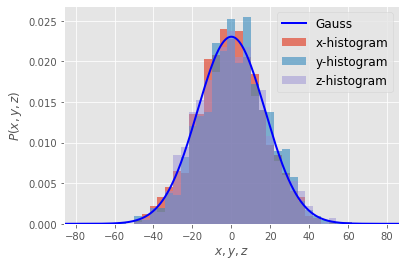

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(Rs[nums-1,:,0],range=[nmin,nmax],bins=nbin,density=True, stacked=True, alpha=0.7,label=r'x-histogram') # plot normalized histogram of L
ax.hist(Rs[nums-1,:,1],range=[nmin,nmax],bins=nbin,density=True, stacked=True, alpha=0.6,label=r'y-histogram') # plot normalized histogram of L
ax.hist(Rs[nums-1,:,2],range=[nmin,nmax],bins=nbin,density=True, stacked=True, alpha=0.5,label=r'z-histogram') # plot normalized histogram of L

x1 = np.arange(nmin,nmax,0.01/std) # create array of x from nmin to nmax with increment y = np.exp(-(x-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical plt.plot(x,y,lw=2,color='b') # plot y vs. x with blue line
y = np.exp(-(x1-ave)**2/(2*std**2))/np.sqrt(2*np.pi*std**2) # calculate the theoretical

ax.plot(x1,y,lw=2,color='b',label=r'Gauss') # plot y vs. x with blue line
#ax.set_title(r'y-axis particle distribution')
ax.set_xlabel(r'$x,y,z$',fontsize=12) # set x-label
ax.set_ylabel(r'$P(x,y,z)$',fontsize=12) # set y-label
ax.legend(fontsize=12, loc='upper right') # set legends
ax.set_xlim(nmin,nmax) # set x-range
plt.savefig('Figures/einstein ind xyz distr.pdf', bbox_inches='tight')
plt.show() # display plots